<a href="https://colab.research.google.com/github/DangPhan23/AI_W9_31_3_2023/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
from keras.datasets import fashion_mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.utils import img_to_array
from keras.models import load_model
from keras.utils import load_img
from tensorflow import keras
from pylab import *
from PIL import Image
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np 

In [132]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [133]:
x_train.shape

(60000, 28, 28)

In [134]:
y_train.shape

(60000,)

In [135]:
x_test.shape

(10000, 28, 28)

In [136]:
y_test.shape

(10000,)

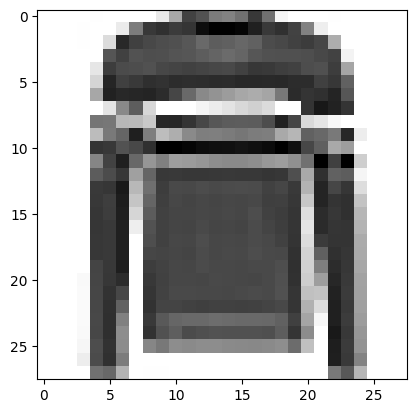

so nay la: [[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184

In [137]:
digit = x_train[5]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print('so nay la:', x_train[5] )

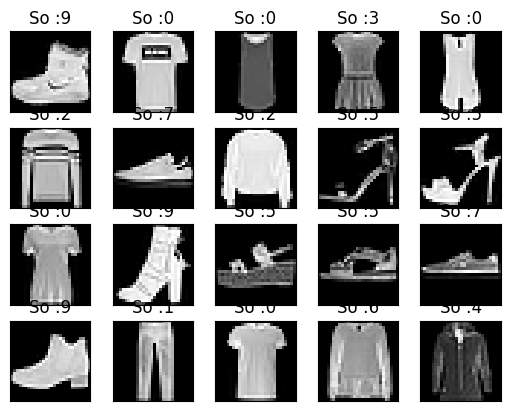

In [138]:
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.tight_layout
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("So " ":{}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [139]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(1024, activation= 'relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 1024)              525312    
                                                                 
 dense_39 (Dense)            (None, 10)                10250     
                                                                 
Total params: 937,482
Trainable params: 937,482
Non-trainable params: 0
_________________________________________________________________


In [140]:
x_train=x_train.reshape((60000, 28*28))
x_train=x_train.astype('float32')/255    

x_test=x_test.reshape((10000, 28*28))
x_test=x_test.astype('float32')/255

y_train=to_categorical(y_train, 10)
y_test=to_categorical(y_test, 10)

In [141]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,epochs= 20, batch_size= 512)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Độ chính xác:', test_acc)
print('Độ mất mát:', test_loss)

Epoch 1/20
118/118 [==============================] - 8s 67ms/step - loss: 0.7141 - accuracy: 0.7459
Epoch 2/20
118/118 [==============================] - 9s 74ms/step - loss: 0.4551 - accuracy: 0.8304
Epoch 3/20
118/118 [==============================] - 8s 71ms/step - loss: 0.3937 - accuracy: 0.8535
Epoch 4/20
118/118 [==============================] - 10s 83ms/step - loss: 0.3555 - accuracy: 0.8680
Epoch 5/20
118/118 [==============================] - 7s 63ms/step - loss: 0.3333 - accuracy: 0.8744
Epoch 6/20
118/118 [==============================] - 8s 71ms/step - loss: 0.3123 - accuracy: 0.8827
Epoch 7/20
118/118 [==============================] - 7s 60ms/step - loss: 0.2904 - accuracy: 0.8910
Epoch 8/20
118/118 [==============================] - 8s 71ms/step - loss: 0.2797 - accuracy: 0.8940
Epoch 9/20
118/118 [==============================] - 8s 64ms/step - loss: 0.2692 - accuracy: 0.8982
Epoch 10/20
118/118 [==============================] - 8s 67ms/step - loss: 0.2547 - accur

In [142]:
model.save('fashion_mnist.h5')

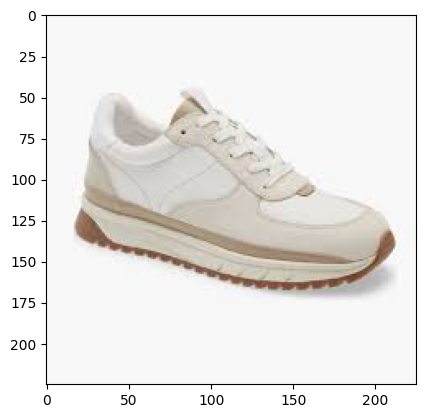

In [168]:
img = Image.open('sneaker.jpg')
imshow(img)

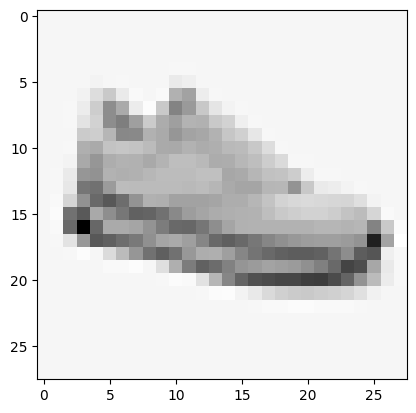

1/1 [==============================] - 0s 25ms/step


array([8])

In [169]:
img = img.convert('L')
img = img.resize((28,28))
plt.imshow(img, cmap= 'gray', interpolation= 'none')
plt.show()
img = np.array(img)
img = img.reshape(1,28*28)
img = img.astype('float32') / 255
np.argmax(model.predict(img),axis= 1)